## Reuters data

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
from tensorflow import keras
from tensorflow.keras import layers

In [58]:
from tensorflow.keras.utils import to_categorical

In [59]:
from tensorflow.keras.datasets import reuters

In [60]:
(train_data, train_labels),\
(test_data, test_labels) = reuters.load_data(num_words=10000)

In [61]:
print(train_data.shape,train_labels.shape)

(8982,) (8982,)


In [62]:
print(test_data.shape,test_labels.shape)

(2246,) (2246,)


In [63]:
# see 10th newswire from the train set
len(train_data[10])

31

In [64]:
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [65]:
# see 15th newswire from the train set
len(train_data[55])

66

In [66]:
print(train_data[55])

[1, 53, 191, 26, 14, 158, 26, 39, 19, 3412, 18, 14, 19, 2656, 18, 86, 688, 32, 11, 14, 597, 44, 11, 180, 183, 61, 6702, 18, 14, 61, 3780, 18, 151, 230, 53, 132, 26, 14, 533, 26, 39, 12, 6613, 18, 14, 12, 6275, 18, 86, 1781, 61, 11, 1761, 59, 11, 180, 183, 61, 4445, 18, 14, 61, 5873, 18, 17, 12]


**Decoding newswires back to text**

In [67]:
word_index = reuters.get_word_index()

In [68]:
type(word_index)

dict

In [69]:
# to see dictionary, convert it to a list 
aux = list(word_index.items())[0:2]
dict(aux)

{'mdbl': 10996, 'fawc': 16260}

In [70]:
# reverse keys and values
[(var,key) for (key, var) in word_index.items()][0:2]

[(10996, 'mdbl'), (16260, 'fawc')]

In [71]:
reverse_word_index = dict([(var,key)\
                           for (key, var) in word_index.items()])

In [72]:
reverse_word_index = dict([(value, key)\
                           for (key, value) in word_index.items()])

In [73]:
# Decode the review. 
# Note that the indices are offset by 3 
# because 0,1,and 2 are reserved indices for "padding", 
#                  "start of sequence", and "unknown"

In [74]:
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?")\
                             for i in train_data[0]])
len(decoded_newswire)

389

In [75]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [76]:
# See newswire topics
df1 = pd.DataFrame(train_labels,columns = ['topic'])
df1.topic.value_counts()

3     3159
4     1949
19     549
16     444
1      432
11     390
20     269
13     172
8      139
10     124
9      101
21     100
25      92
2       74
18      66
24      62
0       55
34      50
12      49
36      49
28      48
6       48
30      45
23      41
31      39
17      39
40      36
32      32
41      30
14      26
39      24
26      24
43      21
15      20
37      19
38      19
29      19
45      18
5       17
7       16
27      15
22      15
42      13
44      12
33      11
35      10
Name: topic, dtype: int64

In [77]:
df1.topic.dtypes

dtype('int64')

In [78]:
df1['topic'] = df1['topic'].astype(object)
df1.topic.describe()

count     8982
unique      46
top          3
freq      3159
Name: topic, dtype: int64

**Encoding the input data**

In [79]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [80]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [81]:
print(x_train.shape,x_test.shape)

(8982, 10000) (2246, 10000)


**Encoding the labels**

In [82]:
# User-defined function to one-hot encode labels
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [83]:
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [84]:
print(y_train.shape,y_test.shape)

(8982, 46) (2246, 46)


In [85]:
# Using keras to_categorical method (both ways are good)

In [86]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [87]:
print(y_train.shape,y_test.shape)

(8982, 46) (2246, 46)


### Build model

In [88]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

### Compile model

In [89]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validation

In [90]:
# set aside the validation set
partial_x_train = x_train[1000:]
partial_y_train = y_train[1000:]

# test set
x_val = x_train[:1000]
y_val = y_train[:1000]

### Train the model (20 epochs)

In [91]:
history = model.fit(partial_x_train,partial_y_train,
                    epochs=20,batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 0s 12ms/step - loss: 2.5452 - accuracy: 0.4910 - val_loss: 1.6651 - val_accuracy: 0.6390
Epoch 2/20
16/16 [==============================] - 0s 9ms/step - loss: 1.3911 - accuracy: 0.6988 - val_loss: 1.2581 - val_accuracy: 0.7230
Epoch 3/20
16/16 [==============================] - 0s 9ms/step - loss: 1.0411 - accuracy: 0.7751 - val_loss: 1.1129 - val_accuracy: 0.7520
Epoch 4/20
16/16 [==============================] - 0s 9ms/step - loss: 0.8259 - accuracy: 0.8244 - val_loss: 1.0177 - val_accuracy: 0.7870
Epoch 5/20
16/16 [==============================] - 0s 9ms/step - loss: 0.6575 - accuracy: 0.8666 - val_loss: 0.9471 - val_accuracy: 0.7950
Epoch 6/20
16/16 [==============================] - 0s 9ms/step - loss: 0.5281 - accuracy: 0.8920 - val_loss: 0.9019 - val_accuracy: 0.8120
Epoch 7/20
16/16 [==============================] - 0s 9ms/step - loss: 0.4225 - accuracy: 0.9122 - val_loss: 0.8840 - val_accuracy: 0.8140
Epoch 8/20
16/16 [=

In [92]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [93]:
df9 = pd.DataFrame(history_dict)
df9.index = range(1,21)
df9

,loss,accuracy,val_loss,val_accuracy
1,2.545177,0.490980,1.665100,0.639
2,1.391077,0.698822,1.258056,0.723
3,1.041145,0.775119,1.112869,0.752
4,0.825949,0.824355,1.017738,0.787
5,0.657540,0.866575,0.947129,0.795
6,0.528120,0.892007,0.901879,0.812
7,0.422487,0.912177,0.884048,0.814
8,0.347410,0.926084,0.954315,0.782
9,0.286693,0.934102,0.881968,0.823
10,0.240055,0.943122,0.927826,0.810


### Plot training and validation loss

In [94]:
df9[df9.val_loss==df9.val_loss.min()]

,loss,accuracy,val_loss,val_accuracy
9,0.286693,0.934102,0.881968,0.823


In [96]:
val_loss = history.history["val_loss"]
epochs = range(1,21)

In [95]:
df99 = df9.iloc[:,[0,2]]

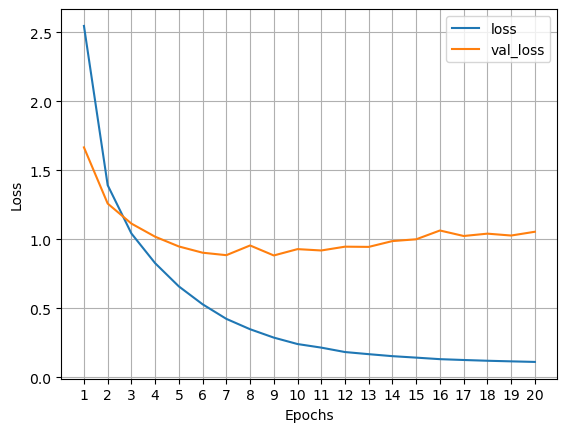

In [97]:
df99.plot()
plt.xticks(epochs)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()

### Plot training and validation accuracy

In [98]:
df9[df9.val_accuracy==df9.val_accuracy.max()]

,loss,accuracy,val_loss,val_accuracy
11,0.214139,0.946379,0.918055,0.828


In [100]:
val_loss = history.history["val_loss"]
epochs = range(1,21)

In [99]:
df99 = df9.iloc[:,[1,3]]

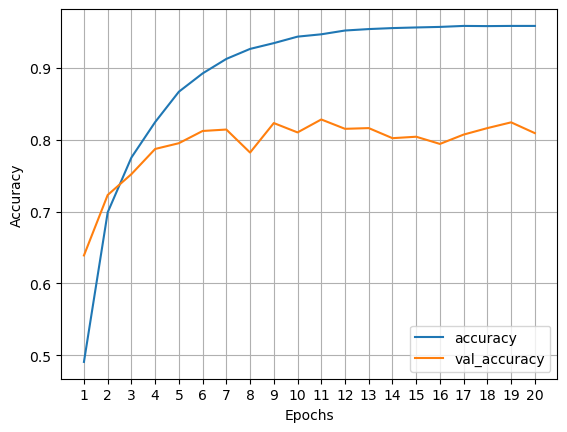

In [102]:
df99.plot()
plt.xticks(epochs)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc=4)
plt.grid()

In [103]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

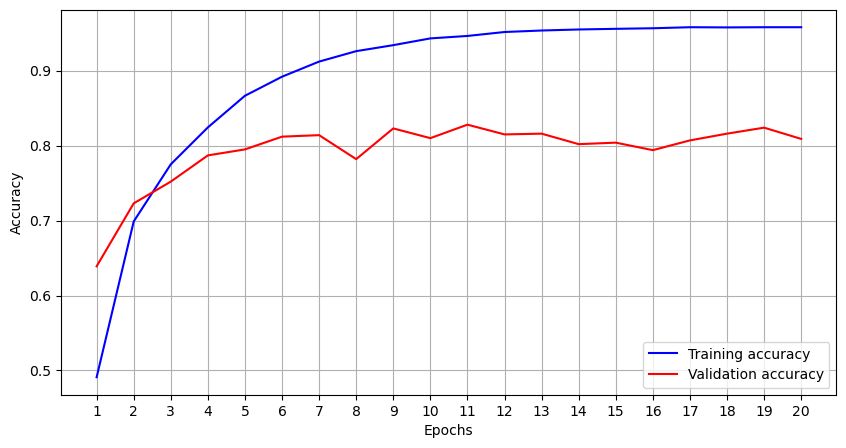

In [104]:
plt.figure(figsize=(10,5))
plt.plot(epochs, acc, "b", label="Training accuracy")
plt.plot(epochs, val_acc, "r", label="Validation accuracy")
plt.xticks(epochs)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc=4)
plt.grid();

### Retrain a model from scratch (11 epochs)

In [105]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])

In [106]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [107]:
model.fit(x_train,y_train,epochs=11,batch_size=512);

Epoch 1/11
18/18 [==============================] - 0s 8ms/step - loss: 2.5172 - accuracy: 0.5311
Epoch 2/11
18/18 [==============================] - 0s 7ms/step - loss: 1.4046 - accuracy: 0.7089
Epoch 3/11
18/18 [==============================] - 0s 7ms/step - loss: 1.0308 - accuracy: 0.7801
Epoch 4/11
18/18 [==============================] - 0s 8ms/step - loss: 0.8073 - accuracy: 0.8326
Epoch 5/11
18/18 [==============================] - 0s 8ms/step - loss: 0.6362 - accuracy: 0.8697
Epoch 6/11
18/18 [==============================] - 0s 8ms/step - loss: 0.5080 - accuracy: 0.8958
Epoch 7/11
18/18 [==============================] - 0s 8ms/step - loss: 0.4054 - accuracy: 0.9182
Epoch 8/11
18/18 [==============================] - 0s 8ms/step - loss: 0.3337 - accuracy: 0.9312
Epoch 9/11
18/18 [==============================] - 0s 8ms/step - loss: 0.2755 - accuracy: 0.9394
Epoch 10/11
18/18 [==============================] - 0s 9ms/step - loss: 0.2363 - accuracy: 0.9447
Epoch 11/11
18/18 [

In [108]:
test_loss,test_acc = model.evaluate(x_test,y_test)

71/71 [==============================] - 0s 560us/step - loss: 0.9903 - accuracy: 0.7961


In [109]:
test_loss

0.9902769923210144

In [110]:
test_acc

0.7960819005966187

### Generating predictions on new data

In [111]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 501us/step


In [112]:
predictions[0].shape

(46,)

In [113]:
np.sum(predictions[0])

1.0000002

In [114]:
# predict category
np.argmax(predictions[0])

3